**Description:** The project focuses on developing and evaluating dynamic pricing models for retail. It compares traditional statistical methods like ARIMA with ensemble learning techniques, such as Random Forests. 

**Research Problem:** Traditional models often struggle with complex data patterns and large datasets. The problem is to determine whether advanced ensemble learning techniques can outperform traditional time-series models in predicting optimal prices.

### Strategies for Dynamic Pricing:
1. **Rule-Based Pricing:** Setting prices based on predefined rules like competitor prices, stock levels, or markdown schedules. Works well as a baseline for both model types.
2. **Demand Forecasting:** Predicting future demand to adjust prices dynamically, commonly used in time-series models.
3. **Elasticity-Based Pricing:** Adjusting prices based on the estimated price elasticity of demand, often implemented using ensemble models for non-linear relationships.
4. **Optimization-Based Pricing:** Using optimization algorithms to maximize revenue or profit by integrating model predictions with constraints like inventory and competitor prices.
5. **Context-Aware Pricing:** Leveraging additional factors like seasonality, promotions, or customer behavior, often better captured by ensemble models due to their feature flexibility.

### Differences in Strategies:
1. **Time-Series Models:** Focus on temporal patterns and demand forecasting, relying heavily on historical sales and seasonality trends.
2. **Ensemble Models:** Incorporate broader feature sets (e.g., competitor prices, customer ratings) and excel in capturing complex, non-linear relationships, making them suitable for context-aware and elasticity-based pricing.

### Data Understanding
This dataset provides synthetic yet realistic data for analyzing and forecasting retail store inventory demand. It contains over 73000 rows of daily data across multiple stores and products, including attributes like sales, inventory levels, pricing, weather, promotions, and holidays.

1. Date: Daily records from [start_date] to [end_date].
2. Store ID & Product ID: Unique identifiers for stores and products.
3. Category: Product categories like Electronics, Clothing, Groceries, etc.
4. Region: Geographic region of the store.
5. Inventory Level: Stock available at the beginning of the day.
6. Units Sold: Units sold during the day.
7. Demand Forecast: Predicted demand based on past trends.
8. Weather Condition: Daily weather impacting sales.
9. Holiday/Promotion: Indicators for holidays or promotions.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
dataset = pd.read_csv("Datasets/retail_store_inventory.csv")

In [4]:
dataset.tail()

,Date,Store ID,Product ID,Category,Region,Inventory Level,Units Sold,Units Ordered,Demand Forecast,Price,Discount,Weather Condition,Holiday/Promotion,Competitor Pricing,Seasonality
73095,2024-01-01,S005,P0016,Furniture,East,96,8,127,18.46,73.73,20,Snowy,0,72.45,Winter
73096,2024-01-01,S005,P0017,Toys,North,313,51,101,48.43,82.57,10,Cloudy,0,83.78,Autumn
73097,2024-01-01,S005,P0018,Clothing,West,278,36,151,39.65,11.11,10,Rainy,0,10.91,Winter
73098,2024-01-01,S005,P0019,Toys,East,374,264,21,270.52,53.14,20,Rainy,0,55.80,Spring
73099,2024-01-01,S005,P0020,Groceries,East,117,6,165,2.33,78.39,20,Rainy,1,79.52,Spring


In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73100 entries, 0 to 73099
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Date                73100 non-null  object 
 1   Store ID            73100 non-null  object 
 2   Product ID          73100 non-null  object 
 3   Category            73100 non-null  object 
 4   Region              73100 non-null  object 
 5   Inventory Level     73100 non-null  int64  
 6   Units Sold          73100 non-null  int64  
 7   Units Ordered       73100 non-null  int64  
 8   Demand Forecast     73100 non-null  float64
 9   Price               73100 non-null  float64
 10  Discount            73100 non-null  int64  
 11  Weather Condition   73100 non-null  object 
 12  Holiday/Promotion   73100 non-null  int64  
 13  Competitor Pricing  73100 non-null  float64
 14  Seasonality         73100 non-null  object 
dtypes: float64(3), int64(5), object(7)
memory usage: 8.4+

### Exploratory Data Analysis

In [6]:
dataset.describe()

,Inventory Level,Units Sold,Units Ordered,Demand Forecast,Price,Discount,Holiday/Promotion,Competitor Pricing
count,73100.000000,73100.000000,73100.000000,73100.000000,73100.000000,73100.000000,73100.000000,73100.000000
mean,274.469877,136.464870,110.004473,141.494720,55.135108,10.009508,0.497305,55.146077
std,129.949514,108.919406,52.277448,109.254076,26.021945,7.083746,0.499996,26.191408
min,50.000000,0.000000,20.000000,-9.990000,10.000000,0.000000,0.000000,5.030000
25%,162.000000,49.000000,65.000000,53.670000,32.650000,5.000000,0.000000,32.680000
50%,273.000000,107.000000,110.000000,113.015000,55.050000,10.000000,0.000000,55.010000
75%,387.000000,203.000000,155.000000,208.052500,77.860000,15.000000,1.000000,77.820000
max,500.000000,499.000000,200.000000,518.550000,100.000000,20.000000,1.000000,104.940000


In [7]:
# Dealing with outliers
dataset.isnull().sum()

Date                  0
Store ID              0
Product ID            0
Category              0
Region                0
Inventory Level       0
Units Sold            0
Units Ordered         0
Demand Forecast       0
Price                 0
Discount              0
Weather Condition     0
Holiday/Promotion     0
Competitor Pricing    0
Seasonality           0
dtype: int64

In [8]:
dataset.isna().sum()

Date                  0
Store ID              0
Product ID            0
Category              0
Region                0
Inventory Level       0
Units Sold            0
Units Ordered         0
Demand Forecast       0
Price                 0
Discount              0
Weather Condition     0
Holiday/Promotion     0
Competitor Pricing    0
Seasonality           0
dtype: int64

In [9]:
dataset['Date'] = pd.to_datetime(dataset['Date'])  # Ensure 'Date' is in datetime format

In [10]:
# Adding 'Week', 'Month', and 'Year' features
dataset['Week'] = dataset['Date'].dt.isocalendar().week
dataset['Month'] = dataset['Date'].dt.month
dataset['Year'] = dataset['Date'].dt.year

In [11]:
# Calculate revenue for each row
dataset['Revenue'] = dataset['Units Sold'] * dataset['Price']

In [12]:
dataset.head(2)

,Date,Store ID,Product ID,Category,Region,Inventory Level,Units Sold,Units Ordered,Demand Forecast,Price,Discount,Weather Condition,Holiday/Promotion,Competitor Pricing,Seasonality,Week,Month,Year,Revenue
0,2022-01-01,S001,P0001,Groceries,North,231,127,55,135.47,33.50,20,Rainy,0,29.69,Autumn,52,1,2022,4254.5
1,2022-01-01,S001,P0002,Toys,South,204,150,66,144.04,63.01,20,Sunny,0,66.16,Autumn,52,1,2022,9451.5


#### How do sales trends vary over time (weekly, monthly, yearly, seasonally)?

In [21]:
# Group by Week
weekly_sales = dataset.groupby('Week')['Units Sold'].sum().reset_index()
# Group by Month
monthly_sales = dataset.groupby('Month')['Units Sold'].sum().reset_index()
# Group by Year
yearly_sales = dataset.groupby('Year')['Units Sold'].sum().reset_index()
# Group by Seasonality
seasonal_sales = dataset.groupby('Seasonality')['Units Sold'].sum().reset_index()

# Define the groups and their respective titles and x-axis labels
groups = [('Week', weekly_sales, 'Weekly Sales Trend', 'Week'),
          ('Month', monthly_sales, 'Monthly Sales Trend', 'Month'),
          ('Year', yearly_sales, 'Yearly Sales Trend', 'Year'),
          ('Seasonality', seasonal_sales, 'Seasonal Sales Trend', 'Season')]

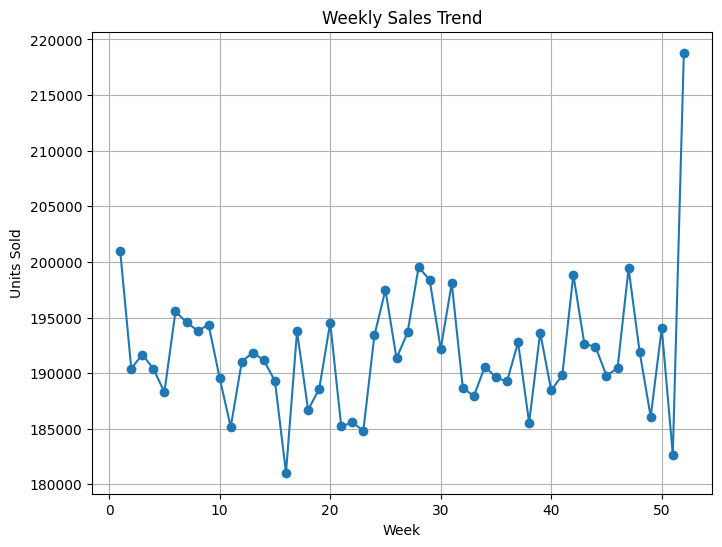

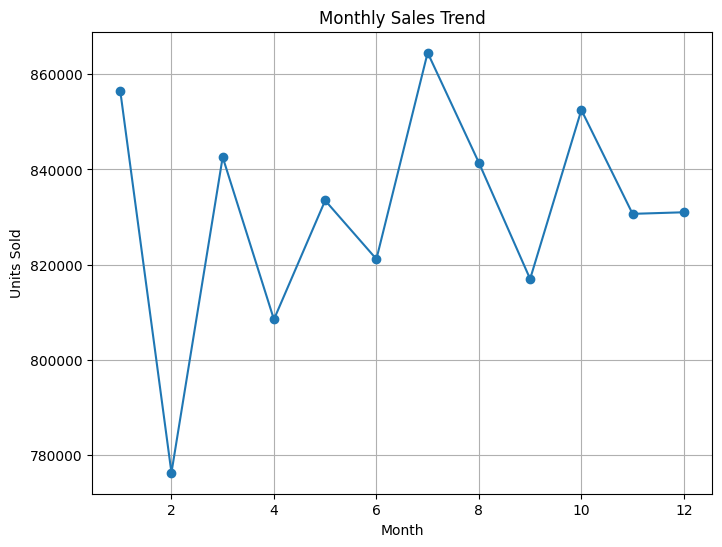

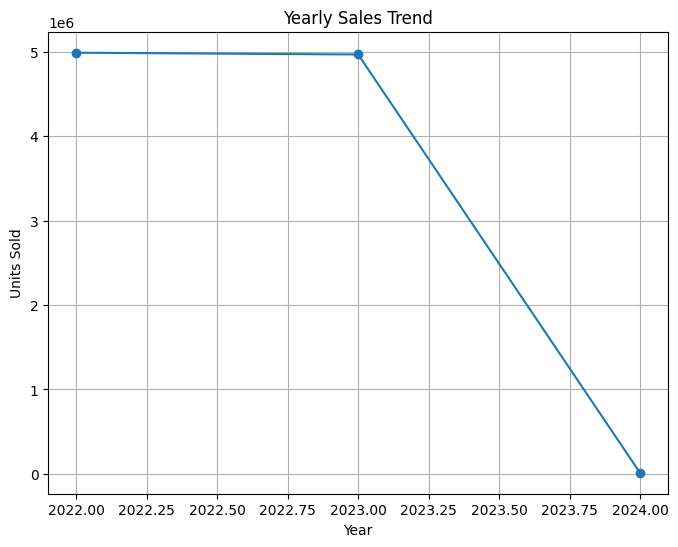

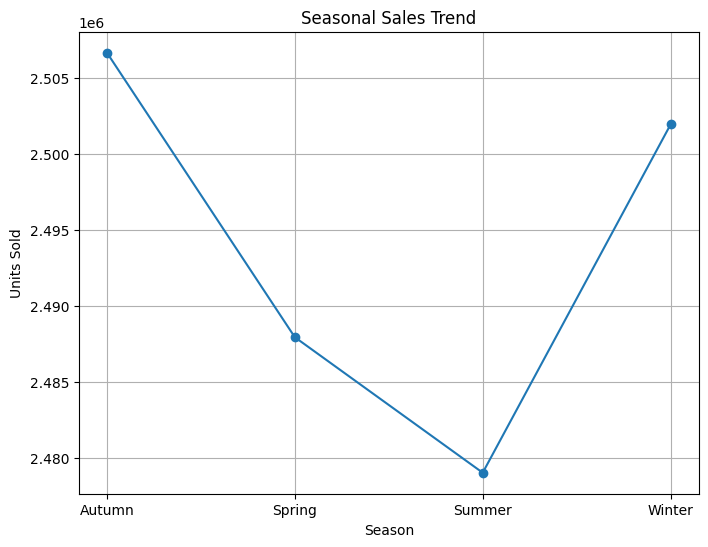

In [23]:
# Loop through each group and plot
for group, data, title, xlabel in groups:
    plt.figure(figsize=(8, 6))
    plt.plot(data[group], data['Units Sold'], marker='o')
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel('Units Sold')
    plt.grid(True)
    plt.show()

> Weekly sales trend, shows there is an increase Units Sales during summer weeks (23-31) and during last weeks of the year (50-52)!  

> Monthly sales trend, shows there is an decrease in Units Sold after new year (in Februari) then it increases again in March and also there is an increase Units Sales during summer months (6-8)!  

> Yearly sales trend, shows linear Units Sold during 2022 and 2023 but decreases in 2024 (It maybe is due to the dataset has only data for the first month of 2024 and not the whole year)!  

> Seasonal Sales trend, starts in Autumn in the highest Units Sales, then decreases during Spring and is lowest in the Summer then increases during Winter.

#### How do revenue trends vary over time (daily, weekly, monthly, seasonally)?

In [25]:
# Group by Week
weekly_revenue = dataset.groupby('Week')['Revenue'].sum().reset_index()
# Group by Month
monthly_revenue = dataset.groupby('Month')['Revenue'].sum().reset_index()
# Group by Year
yearly_revenue = dataset.groupby('Year')['Revenue'].sum().reset_index()
# Group by Season
seasonal_revenue = dataset.groupby('Seasonality')['Revenue'].sum().reset_index()

# Define the groups and their respective titles and x-axis labels
groups = [('Week', weekly_revenue, 'Weekly Revenue Trend', 'Week'),
          ('Month', monthly_revenue, 'Monthly Revenue Trend', 'Month'),
          ('Year', yearly_revenue, 'Yearly Revenue Trend', 'Year'),
          ('Seasonality', seasonal_revenue, 'Seasonal Revenue Trend', 'Season')]

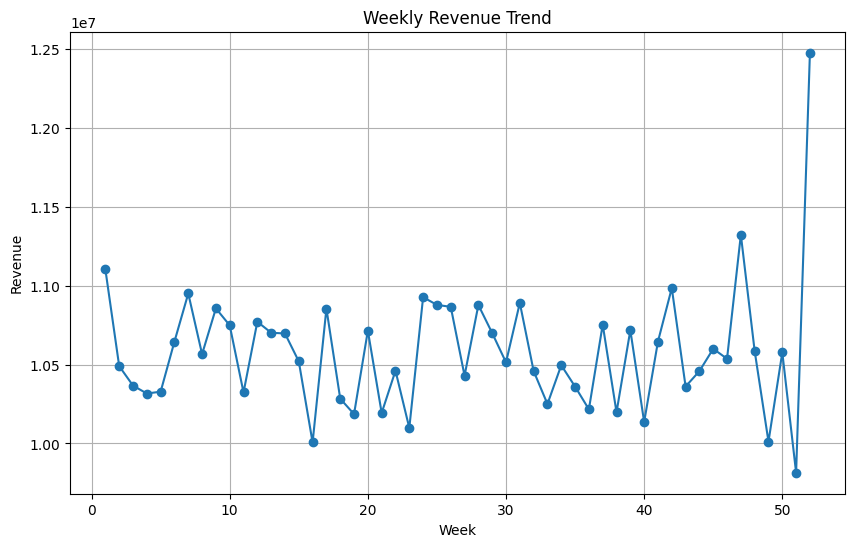

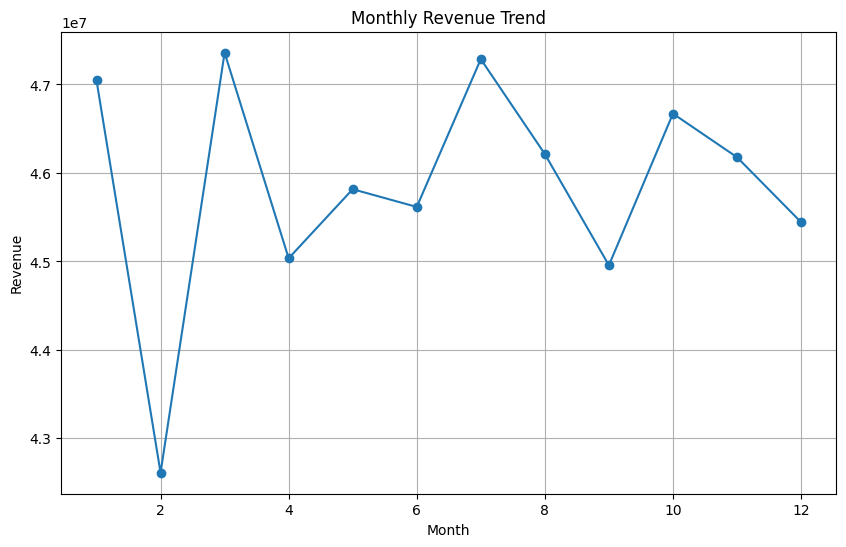

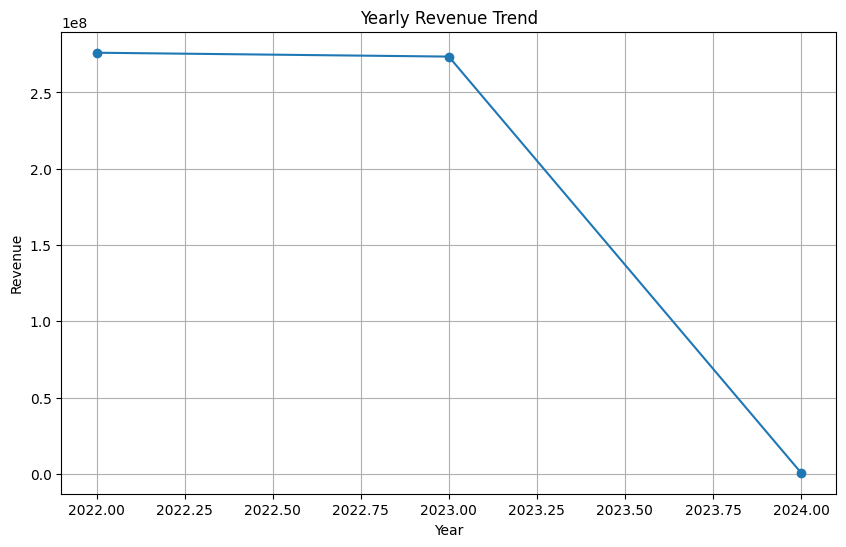

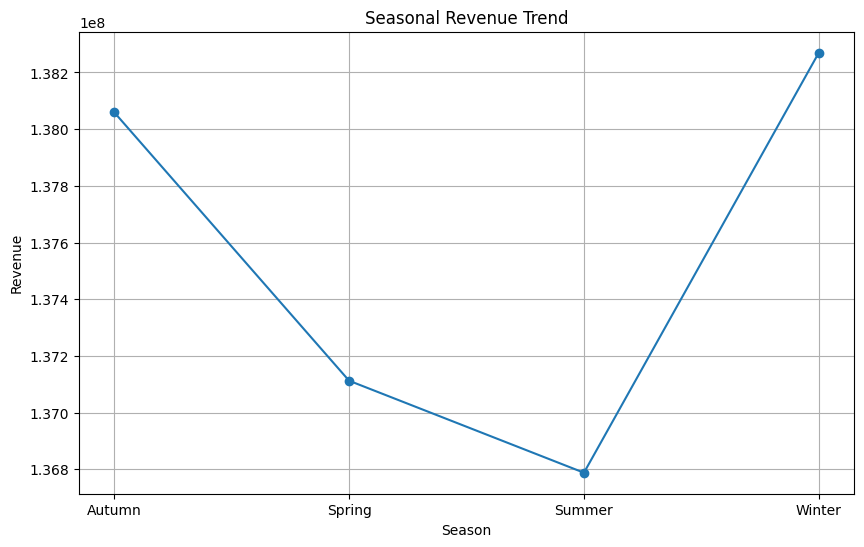

In [26]:
# Loop through each group and plot
for group, data, title, xlabel in groups:
    plt.figure(figsize=(10, 6))
    plt.plot(data[group], data['Revenue'], marker='o')
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel('Revenue')
    plt.grid(True)
    plt.show()

> Weekly revenue trend, shows there is an increase Units Sales during summer weeks (23-31) and during last weeks of the year (50-52)!  

> Monthly revenue trend, shows there is an decrease in Units Sold after new year (in Februari) then it increases again in March and also there is an increase Units Sales during summer months (6-8)!  

> Yearly revenue trend, shows linear Units Sold during 2022 and 2023 but decreases in 2024 (It maybe is due to the dataset has only data for the first month of 2024 and not the whole year)!  

> Seasonal revenue trend, starts in Autumn in the highest Units Sales, then decreases during Spring and is lowest in the Summer then increases during Winter.

